# Praveer Raj
## Maths and computing(batch 1)
## Roll. no. 1
## Date: 20-01-2025
## LAB 3 Q 2

1. For the IRIS data set write down the meta information.

In [1]:
import pandas as pd

iris_data = pd.read_csv('Iris.csv')
print("Meta Information:")
print(iris_data.info())
print("\nDescriptive Statistics:")
print(iris_data.describe())


Meta Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Descriptive Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1

2. Visualize the class label against the predictor variable using appropriate plots.


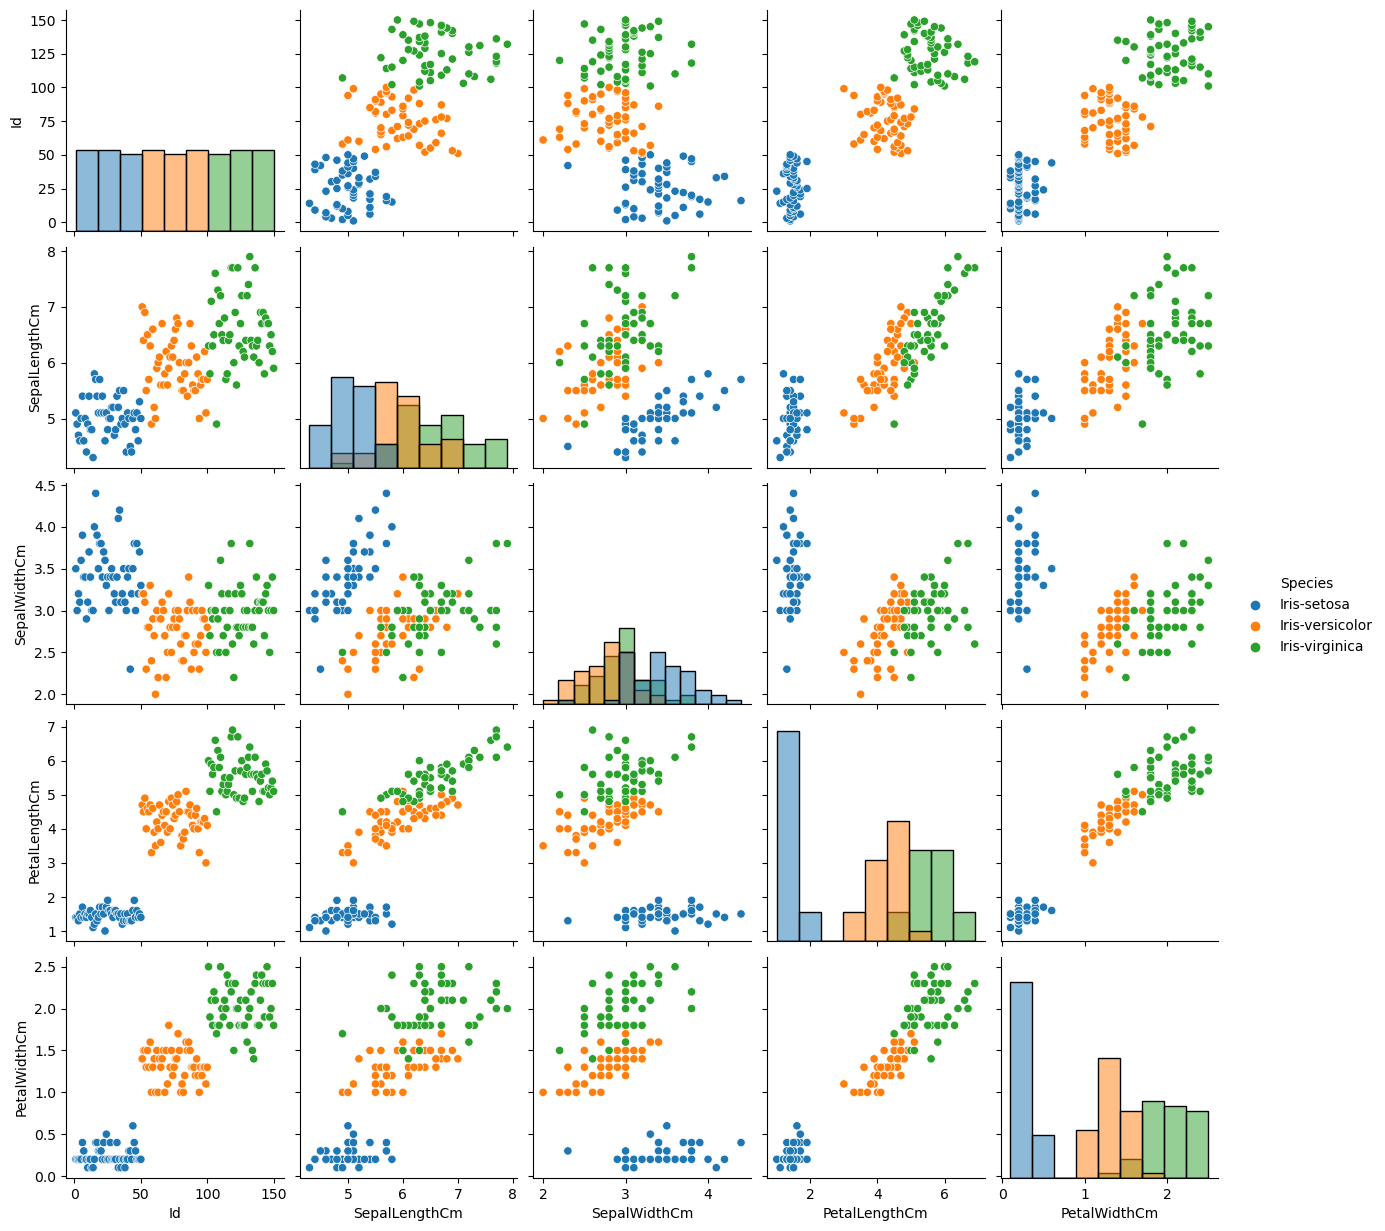

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_data, hue='Species', diag_kind='hist')
plt.show()


3. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_data.drop(['Id', 'Species'], axis=1)
y = iris_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Logistic Regression Model Training Complete.")
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Labels:", y_test.values[:10])


Logistic Regression Model Training Complete.
First 10 Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']
First 10 Actual Labels: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


4. Analysis and visualize the performance of the classifier using metrics, confusion matrix.

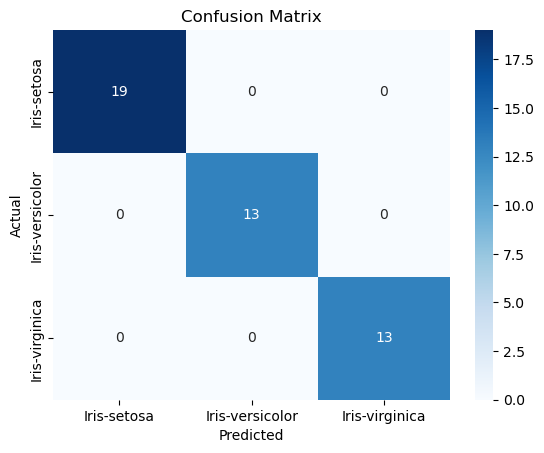

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [4]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_data['Species'].unique(), yticklabels=iris_data['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


5. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

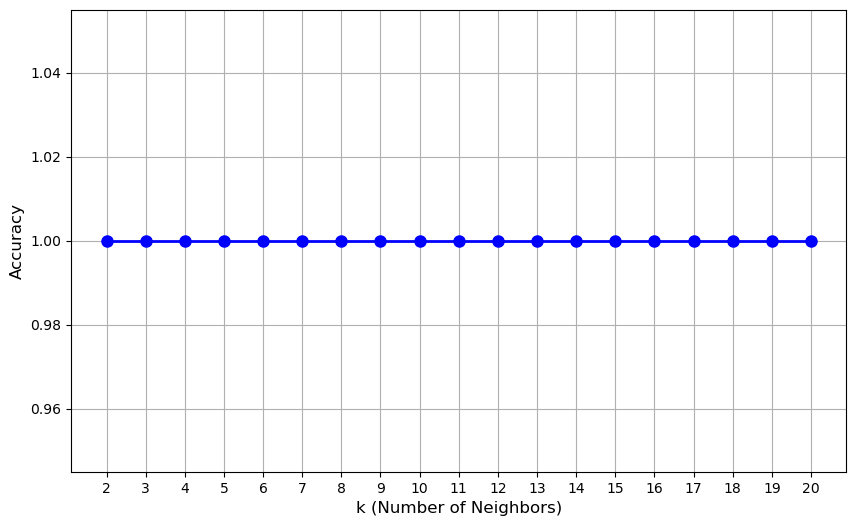

Best k value: 2
Best accuracy: 1.0000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming iris_data is the dataset loaded
X = iris_data.drop(['Species', 'Id'], axis=1)  # Drop 'Id' if it's present
y = iris_data['Species']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# K-Nearest Neighbors (KNN) for different k values
k_values = list(range(2, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")


6. Identify the best k (for k between 2 and 20) for the model built

In [6]:
best_k = k_range[knn_scores.index(max(knn_scores))]
print(f"Best k: {best_k}, with accuracy: {max(knn_scores):.2f}")


Best k: 2, with accuracy: 1.00


7. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset.

In [7]:
log_accuracy = log_model.score(X_test, y_test)
knn_best_accuracy = max(knn_scores)

print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print(f"KNN Best Accuracy (k={best_k}): {knn_best_accuracy:.2f}")

if log_accuracy > knn_best_accuracy:
    print("Logistic Regression performs better.")
else:
    print("KNN performs better.")


Logistic Regression Accuracy: 1.00
KNN Best Accuracy (k=2): 1.00
KNN performs better.
